In [8]:
import benchmax.evaluation as ev
import pandas
import matplotlib.pyplot as plt
import tikzplotlib

stats = ev.csv_to_pandas('stats_qe_24-02-07_13:43.csv', rename = {'qe-tools-wrapper/tarski_wrapper.py':'qepcad', 'qe-tools-wrapper/redlog_wrapper.py':'redlog'}, exclude=['smtrat/build/smtrat-qe'])
stats = stats.join(ev.csv_to_pandas('stats_smtrat_24-07-25_14:55.csv', rename = {'smtrat-Default-development': 'smtrat'}))

stats[('smtrat','output_amount_atoms')] = stats[('smtrat','qe_coverings_output_amount_atoms')]
stats[('smtrat','output_amount_and')] = stats[('smtrat','qe_coverings_output_amount_and')]
stats[('smtrat','output_amount_or')] = stats[('smtrat','qe_coverings_output_amount_or')]
stats.loc[(stats[('smtrat','answer')]=='timeout'), ('smtrat','output_amount_atoms')] = None
stats.loc[(stats[('smtrat','answer')]=='timeout'), ('smtrat','output_amount_and')] = None
stats.loc[(stats[('smtrat','answer')]=='timeout'), ('smtrat','output_amount_or')] = None

ev.transform_to_seconds(stats)

ev.setup_accessible_styles()

## General

In [9]:
ev.inspect_answer(stats)

qepcad  redlog  smtrat
count                   78      78      78
sat                     38      51      48
unsat                    6       6       6
unknown                 25       0       0
wrong                    0       0       0
error                    0       0       0
timeout                  9      21      24
memout                   0       0       0
no answer                0       0       0
segmentation fault       0       0       0
segfault                 0       0       0
abort                    0       0       0
invalid                  0       0       0
parsererror              0       0       0
nosuchfile               0       0       0
solved                  44      57      54

Text(0, 0.5, 'running time (s)')

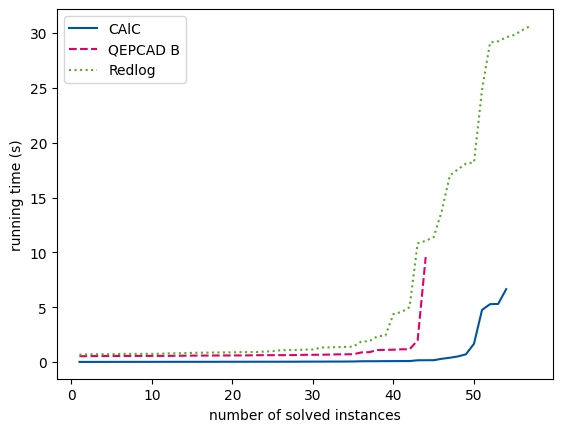

In [10]:
plot = ev.performance_profile(stats,['smtrat','qepcad','redlog'])
plot.axes.legend(['CAlC','QEPCAD B','Redlog'])
#plot.set_xlim(3720,3825)
plot.set_ylabel('running time (s)')
#tikzplotlib.save('results_qe.tex',axis_width='5cm',axis_height='7cm')

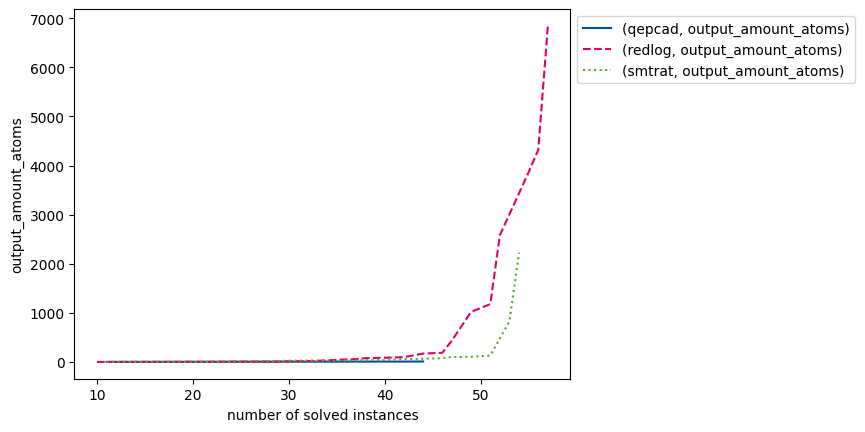

In [11]:
plot = ev.performance_profile(stats,ev.get_solvers(stats),'output_amount_atoms')
plot.axes.legend(bbox_to_anchor=(1,1))
#plot.axes.set_yscale('log')

In [12]:
def compare_field(df, s1, s2, field):
    df1 = df[[(s1,field), (s2,field)]].copy()
    maxval1 = df[(s1,field)].max() * 1.05
    maxval2 = df[(s2,field)].max() * 1.05
    df1.loc[ (~df[(s1,'answer')].isin(['sat', 'unsat'])), (s1,field) ] = maxval1
    df1.loc[ (~df[(s2,'answer')].isin(['sat', 'unsat'])), (s2,field) ] = maxval2

    return ev.scatter_plot(df1, s1, s2, field)

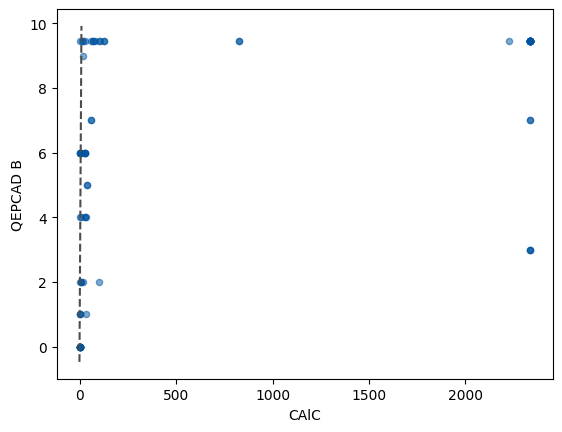

In [13]:
ax = compare_field(stats, 'smtrat', 'qepcad', 'output_amount_atoms')
ax.set_xlabel('CAlC')
ax.set_ylabel('QEPCAD B')
ev.scatter_equal_line(ax)

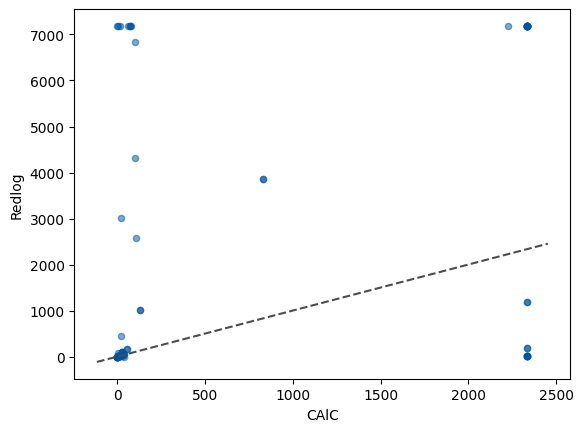

In [14]:
ax = compare_field(stats, 'smtrat', 'redlog', 'output_amount_atoms')
ax.set_xlabel('CAlC')
ax.set_ylabel('Redlog')
ev.scatter_equal_line(ax)

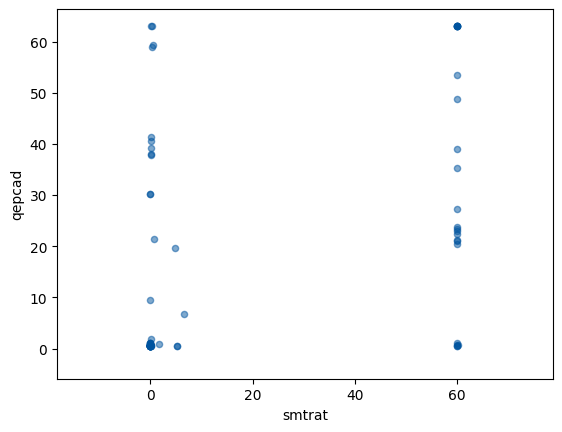

In [15]:
ax = ev.scatter_plot(stats, 'smtrat', 'qepcad', 'runtime')
ev.scatter_axis_equal(ax)